In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set a default style for our plots
sns.set_style('whitegrid')

print("Libraries imported successfully.")

Libraries imported successfully.


In [2]:
# Define the file path
file_path = 'data/creditcard.csv'

# Load the dataset
try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
    print("Please make sure 'creditcard.csv' is in the 'ai-model/data/' folder.")

# 1. Display the first 5 rows
print("\n--- First 5 Rows ---")
print(df.head())

# 2. Get a quick summary of the data (columns, types, nulls)
print("\n--- Data Info ---")
df.info()

# 3. Check for any missing values
print("\n--- Missing Values ---")
print(df.isnull().sum().any())

Dataset loaded successfully!

--- First 5 Rows ---
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.14


--- Class Distribution ---
Class
0    284315
1       492
Name: count, dtype: int64

Percentage of Fraudulent Transactions: 0.1730%


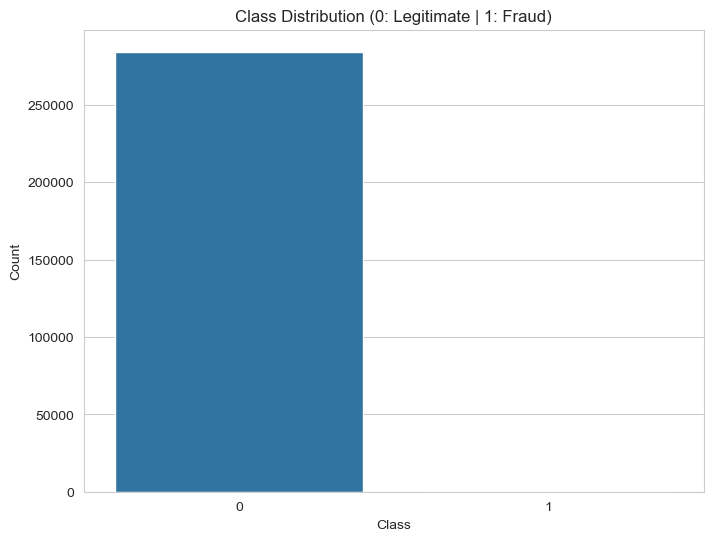

In [3]:
# See the distribution of the 'Class' column
# 0 = Legitimate Transaction
# 1 = Fraudulent Transaction
print("\n--- Class Distribution ---")
class_counts = df['Class'].value_counts()
print(class_counts)

# Calculate the percentage of fraud
fraud_percentage = (class_counts[1] / class_counts[0]) * 100
print(f"\nPercentage of Fraudulent Transactions: {fraud_percentage:.4f}%")

# Visualize the imbalance
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0: Legitimate | 1: Fraud)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [4]:
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# Create copies of the columns to scale
scaled_amount = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
scaled_time = scaler.fit_transform(df['Time'].values.reshape(-1, 1))

# Create a new dataframe with the scaled columns and drop the old ones
df_processed = df.copy()
df_processed['Amount'] = scaled_amount
df_processed['Time'] = scaled_time

print("--- Data after scaling 'Amount' and 'Time' ---")
print(df_processed.head())

--- Data after scaling 'Amount' and 'Time' ---
       Time        V1        V2        V3        V4        V5        V6  \
0 -1.996583 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1 -1.996583  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2 -1.996562 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3 -1.996562 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4 -1.996541 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   

         V7        V8        V9  ...       V21       V22       V23       V24  \
0  0.239599  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928   
1 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.791461  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.237609  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575   
4  0.592941 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26

In [5]:
from sklearn.model_selection import train_test_split

# 1. Define our features (X) and our target (y)
X = df_processed.drop('Class', axis=1)
y = df_processed['Class']

# 2. Split the data
# We use 'test_size=0.2' to hold back 20% of the data for testing
# 'random_state=42' ensures we get the same "random" split every time
# 'stratify=y' is CRITICAL. It ensures that our training and testing sets
# have the same percentage of fraud cases as the original dataset.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Check the results of the split
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")

print("\n--- Class distribution in original data ---")
print(y.value_counts(normalize=True))

print("\n--- Class distribution in testing data (should be similar) ---")
print(y_test.value_counts(normalize=True))

Shape of X_train: (227845, 30)
Shape of X_test: (56962, 30)

--- Class distribution in original data ---
Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

--- Class distribution in testing data (should be similar) ---
Class
0    0.99828
1    0.00172
Name: proportion, dtype: float64
